In [1]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','syntheticMRI2D','sagittal', 'toy-cleaned')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)
LAYER_MAX = 9

In [2]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            


In [3]:
def normalize(image):
    image = image.astype(np.float32)
    return (image - np.nanmean(image)) / np.nanstd(image)

In [4]:
sagittal_wv = convert_to_wavelet_basis(data_dir, "gray", image_func = normalize, debug=True, image_opener = npz_opener)

sagittal_wv['data'] = sagittal_wv['data'].apply(lambda x: x[~np.isnan(x)])
sagittal_wv['size'] = sagittal_wv['data'].apply(lambda x : len(x))
sagittal_wv

9 layers being used


100%|██████████| 999/999 [00:04<00:00, 225.72it/s]


,channel,layer,frequency,orientation,data,size
0,gray,1,0.110679,L1,[],0
1,gray,2,0.124514,D,[],0
2,gray,2,0.124514,H,[],0
3,gray,2,0.124514,V,[],0
4,gray,3,0.142301,D,"[-6.887001, 6.723872, 10.314473, -10.843604, 1...",2001
5,gray,3,0.142301,H,"[-7.2918215, -11.538257, -13.792747, -17.60567...",2001
6,gray,3,0.142301,V,"[-13.480093, 19.95673, 46.201286, -40.63729, 3...",2001
7,gray,4,0.166018,D,"[-4.2298007, -2.9880786, 10.928255, -0.4967794...",18061
8,gray,4,0.166018,H,"[-14.181131, -13.381195, -17.020872, -23.2304,...",18061
9,gray,4,0.166018,V,"[-13.91495, -4.810688, 15.070713, 14.515709, -...",18061


In [5]:
sagittal_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = sagittal_wv[sagittal_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    sagittal_df = pd.concat([sagittal_df, ks_df], axis = 0)
sagittal_df

C:\Users\riyap\AppData\Local\Temp\ipykernel_37364\1673488915.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
C:\Users\riyap\AppData\Local\Temp\ipykernel_37364\1673488915.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
C:\Users\riyap\AppData\Local\Temp\ipykernel_37364\1673488915.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
C:\Users\riyap\AppData\Local\Temp\ipykernel_37364\734620217.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA co

,Layer,First,Second,KS_Stat,Pvalue
0,2,D,H,NaN,NaN
1,2,D,V,NaN,NaN
2,2,H,V,NaN,NaN
1,3,D,V,0.370815,8.673808e-123
0,3,D,H,0.466267,7.999096e-197
2,3,H,V,0.526237,1.438612e-253
1,4,D,V,0.093295,7.495439e-69
2,4,H,V,0.127789,5.194492e-129
0,4,D,H,0.139804,1.956894e-154
2,5,H,V,0.036646,3.504958e-54


c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:514: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:515: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:514: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:515: UserW

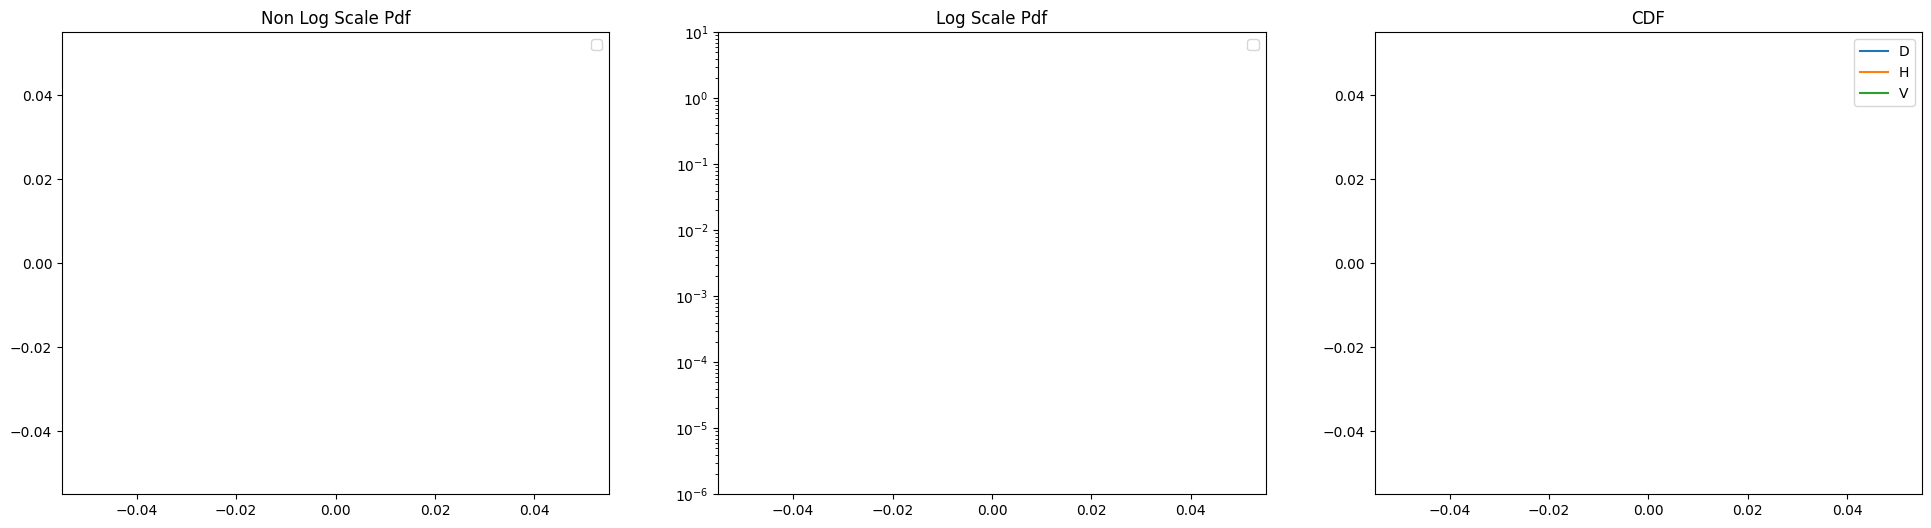

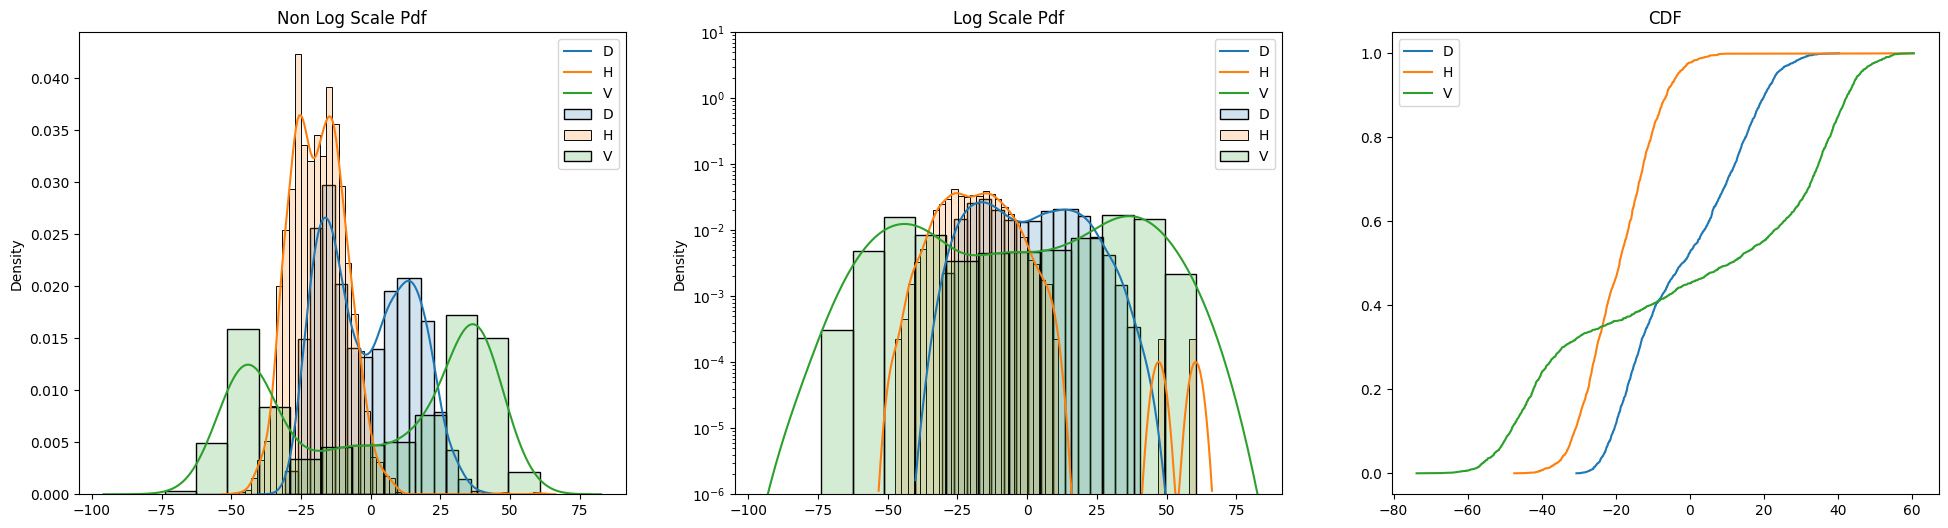

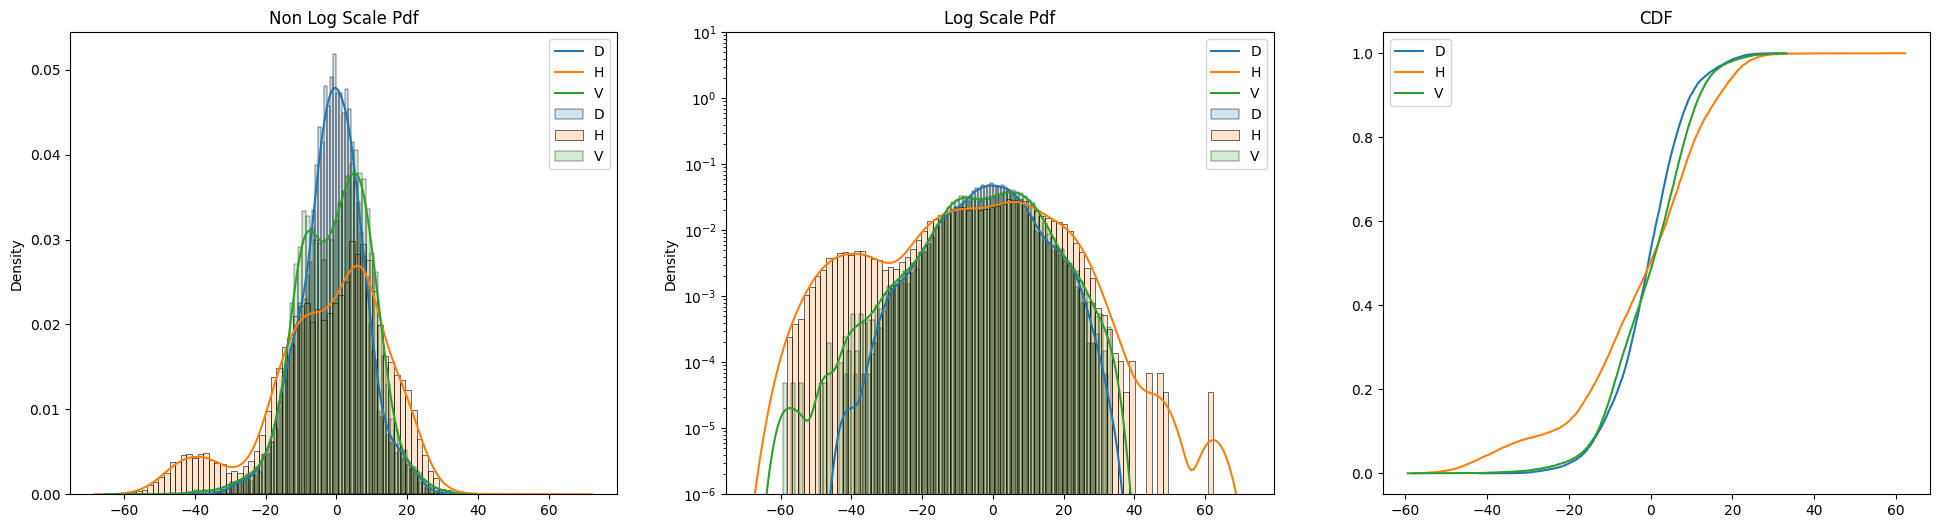

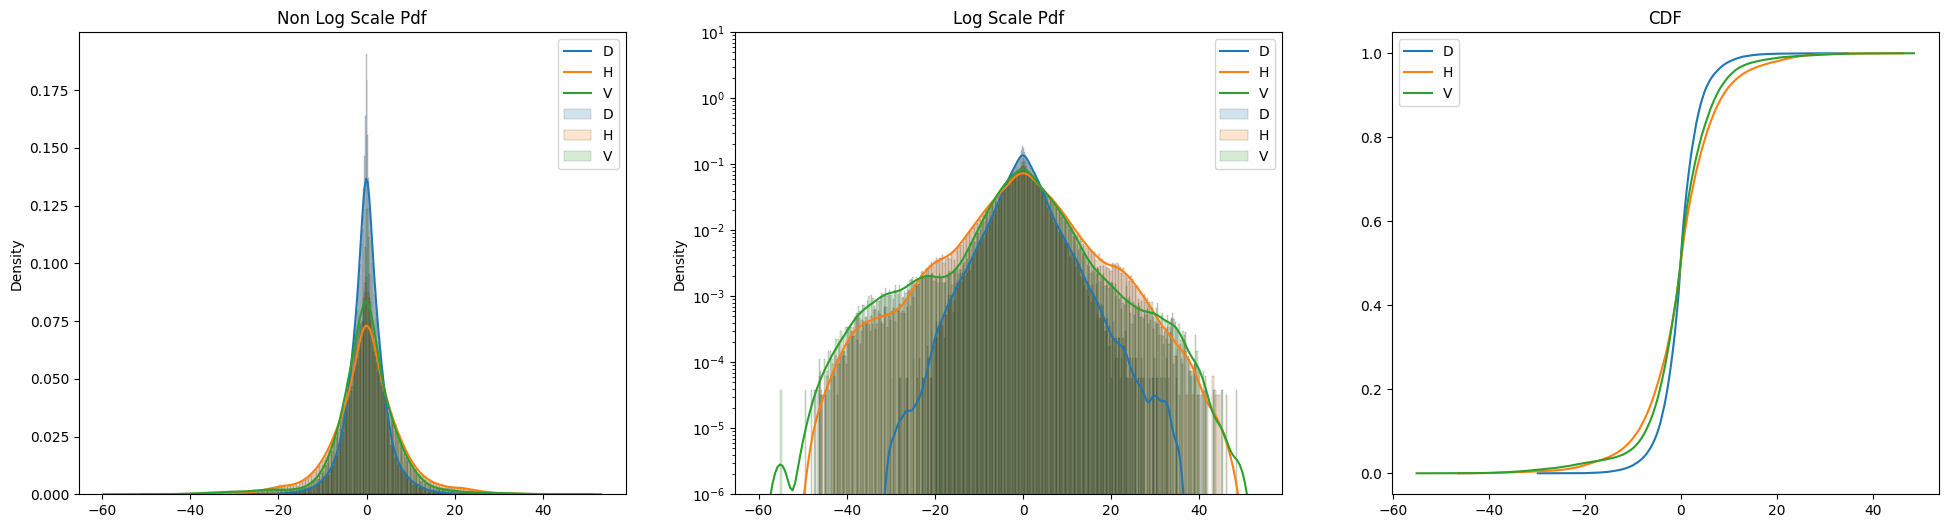

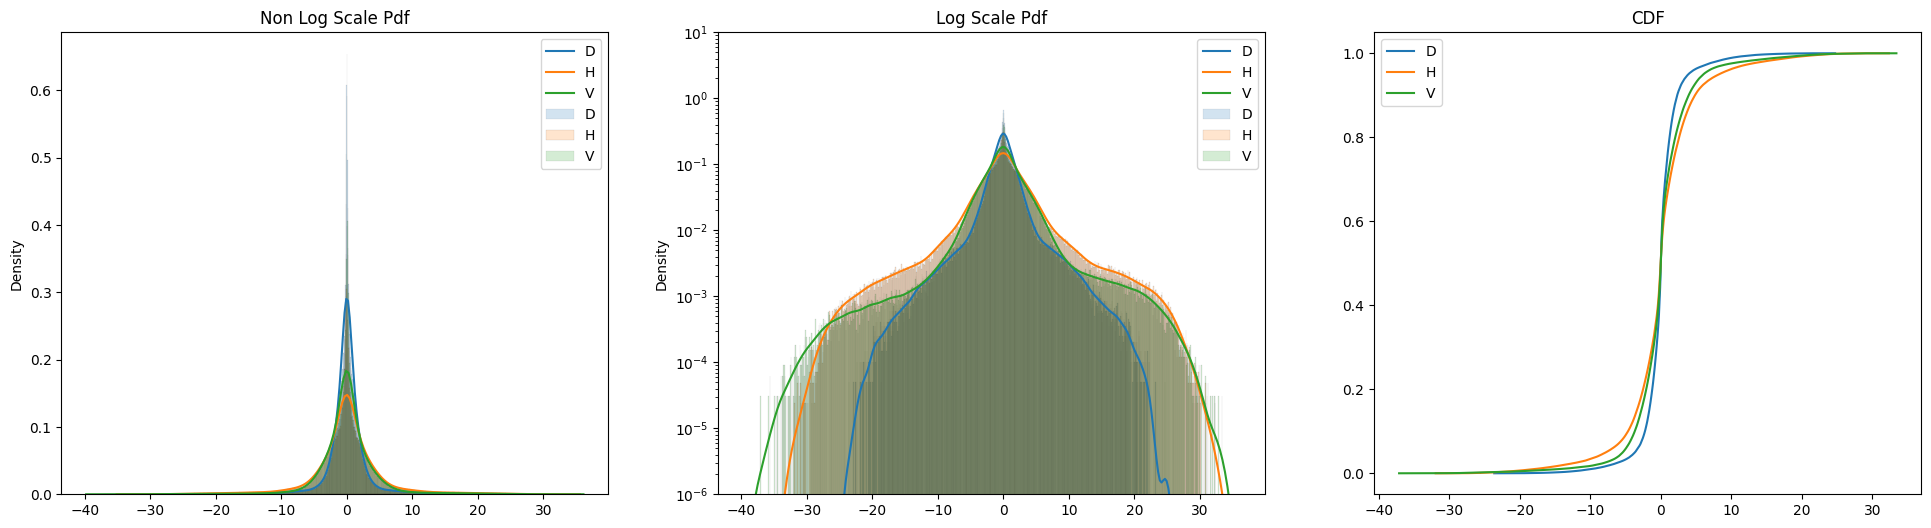

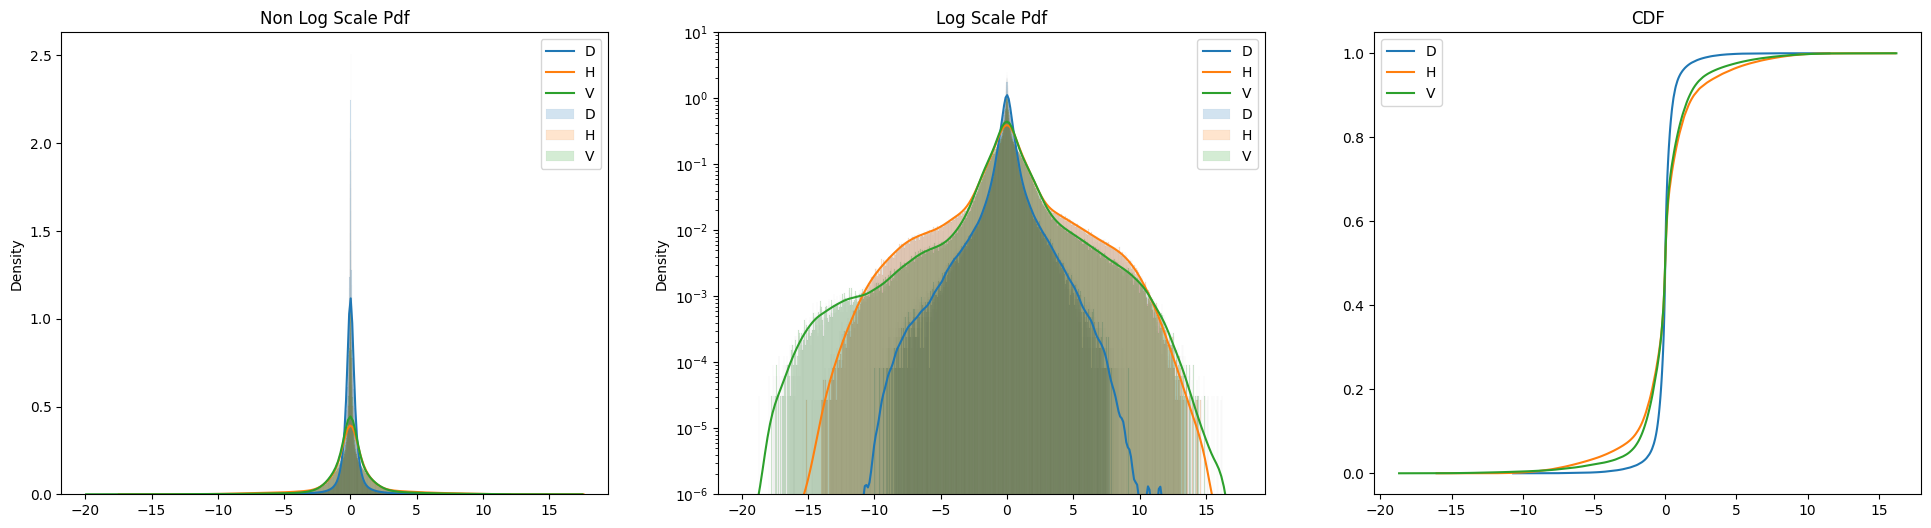

c:\Users\riyap\anaconda3\envs\HBMV\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


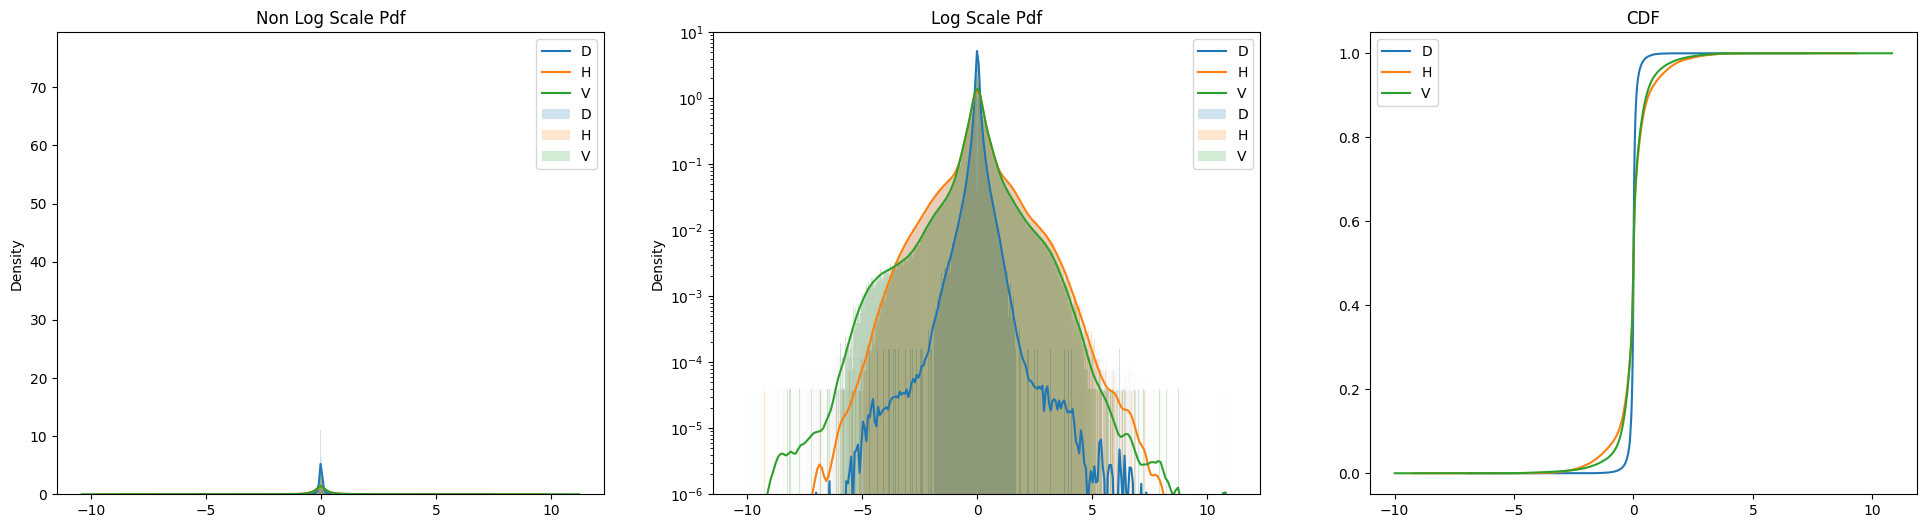

In [6]:
for i in range(2, LAYER_MAX):
    layer_df = sagittal_wv[sagittal_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)